# NLPipe - Data Walkthrough
<p>#TODO: Needs description of what this file is</p>

# Initialize environment

In [1]:
import sys
import os

PROJECT_DIR = f'{os.getcwd()}'
DEMO_DATA_DIR = f'{PROJECT_DIR}/../data'
DEMO_DATA_FILE = f'{DEMO_DATA_DIR}/IMDB Dataset.csv.gz'
UTILITIES_DIR = f'{PROJECT_DIR}/../utilities'

# Add the UTILITY_DIR to the path to import files
sys.path.append(UTILITIES_DIR)

In [2]:
import pandas as pd

# Load Data
<p>Loading the IMDB Dataset<br>
50,000 records on pos/neg sentiment analysis<br>
25,000 records per class<br>

In [3]:
# Loading the IMDB Dataset
ORIG_DF = pd.read_csv(DEMO_DATA_FILE, compression='gzip')
print(f'Data shape: {ORIG_DF.shape}')
display(ORIG_DF.head())

Data shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Setting up variables for later usage in DataPackage
DATA_COLUMN = 'review'
TARGET_COLUMN = 'sentiment'
UNIQUE_COLUMN = None   # Unique index column. If None, one will be created

# DataPackageParams
<p>#TODO: Needs description of what DataPackageParams is</p>

In [5]:
import DataPackage
myDP = DataPackage.DataPackage(original_data = ORIG_DF,
                               data_column = DATA_COLUMN,
                               target_column = TARGET_COLUMN,
                               unique_column = UNIQUE_COLUMN)

In [6]:
myDP.display()

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Data:
---> isOrigDataLoaded: True
---> isWorkingDataLoaded: True
---> isCleanDataLoaded: False
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

Original Data:
---> original data shape: (50000, 3)
Cleaned Data:
---> clean data shape: "N/A"
Working Data:
---> working data shape: (50000, 3)

Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False


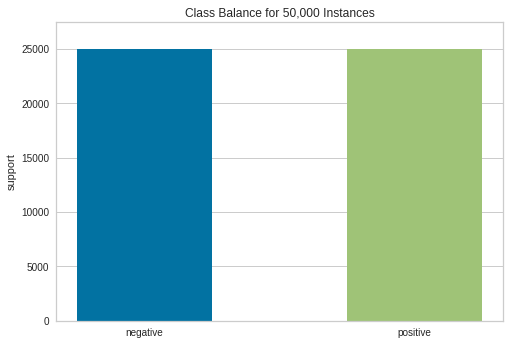

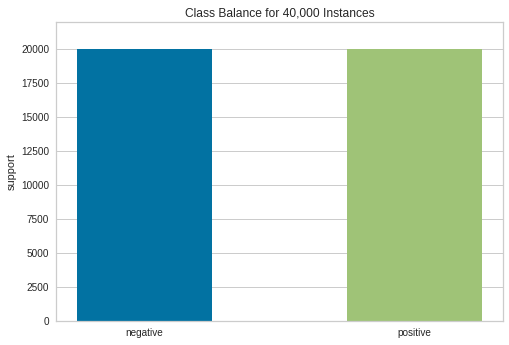

,sentiment,ttlCol
0,negative,20000
1,positive,20000


In [7]:
myDP.classBalanceUndersample(sampleSize=20000)

In [8]:
# Clean the data
myDP.clean_text_column()

Cleaning text column...


100%|███████████████████████████████████| 40000/40000 [00:14<00:00, 2784.96it/s]


In [9]:
myDP.remove_stopwords()

[nltk_data] Downloading package stopwords to /home/magni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing stopwords...


100%|███████████████████████████████████| 40000/40000 [00:07<00:00, 5351.13it/s]


In [10]:
myDP.process_TFIDF(max_features=100)


Encoding to TF-IDF with max_features=100
Encoding completed. Feature list:
['10', 'acting', 'actors', 'actually', 'all', 'also', 'and', 'another', 'around', 'back', 'bad', 'best', 'better', 'big', 'br', 'can', 'cast', 'character', 'characters', 'could', 'director', 'end', 'even', 'ever', 'every', 'fact', 'film', 'films', 'find', 'first', 'funny', 'get', 'go', 'going', 'good', 'great', 'he', 'horror', 'however', 'in', 'it', 'know', 'life', 'like', 'little', 'look', 'lot', 'love', 'made', 'make', 'makes', 'man', 'many', 'movie', 'movies', 'much', 'never', 'new', 'nothing', 'old', 'one', 'part', 'people', 'plot', 'pretty', 'quite', 'real', 'really', 'say', 'scene', 'scenes', 'see', 'seems', 'seen', 'show', 'something', 'still', 'story', 'that', 'the', 'there', 'thing', 'things', 'think', 'this', 'though', 'time', 'two', 'us', 've', 'want', 'watch', 'watching', 'way', 'well', 'work', 'world', 'would', 'years', 'young']



In [11]:
myDP.splitTrainTest(stratifyColumn=None,
                    train_size=0.8,
                    random_state=765,
                    shuffle=True)

Completed train/test split (train_size = 0.8):
---> Original data size: 40000
---> Training data size: 32000
---> Testing data size: 8000
---> Stratified on column: sentiment


In [12]:
myDP.display()

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Data:
---> isOrigDataLoaded: True
---> isWorkingDataLoaded: True
---> isCleanDataLoaded: False
---> isTrainDataLoaded: True
---> isTestDataLoaded: True

Original Data:
---> original data shape: (50000, 3)
Cleaned Data:
---> clean data shape: "N/A"
Working Data:
---> working data shape: (40000, 102)

Process:
---> isProcessed: False
---> isCleaned: True
---> isStopWorded: True
---> isBalanced: True
---> isEncoded: True
---> isTrainTestSplit: True


# Scratchpad